In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 1e-1
solvent_diameter_m = 2.75e-10
gamma_c = 6
ion_diameter_m = gamma_c ** (1/3) * solvent_diameter_m
print(ion_diameter_m * 1e10)
phi0 = -0.5
xmin = 0
xmax = 1

4.997081630288384


## Gouy-Chapman
Gives insight, but ion concentrations are much too high.

Sweep from 0.00V to -0.49V. Maximum relative residual: 3.51933e-05.


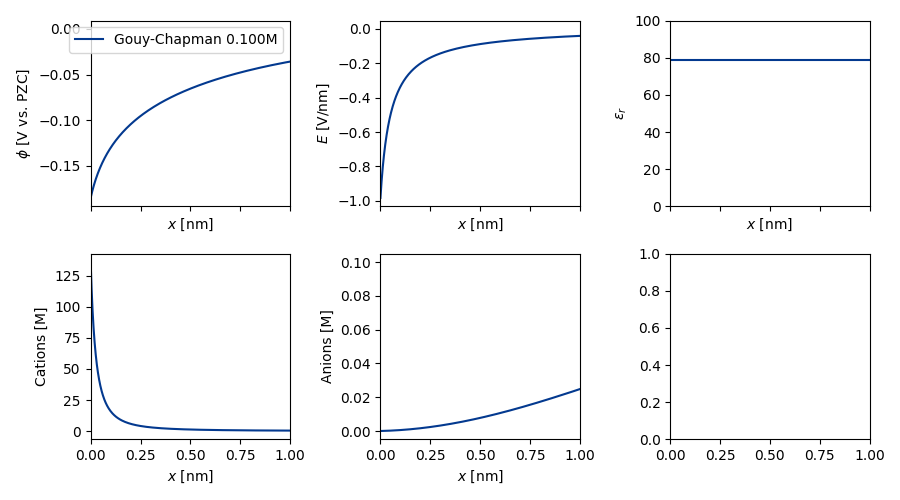

In [3]:
gc = edl.GouyChapman(ion_concentration_molar)

gc_sol = gc.spatial_profiles(phi0)

fig, ax = plotting.plot_solutions([gc_sol], xmin, xmax)
plt.show()

## Borukhov-Andelman-Orland
Ion concentration is limited to its maximum value at the electrode.

In [ ]:
bao = edl.Borukhov(ion_concentration_molar, ion_diameter_m)
bao_sol = bao.spatial_profiles(phi0)

fig, ax = plotting.plot_solutions([bao_sol], xmin, xmax)
plt.show()

## Abrashkin-Andelman-Orland
A Stern layer emerges if the dipole energy is more negative (large dipole moment and large electric field) than the Coulomb energy of ions directly at the electrode.

In [ ]:
abr = edl.Abrashkin(ion_concentration_molar, gamma_c, gamma_c)
abr_sol = abr.spatial_profiles(phi0)

fig, ax = plotting.plot_solutions([abr_sol], xmin, xmax)
plt.show()

## Langevin-Poisson-Boltzmann with pH

In [ ]:
aqu = edl.Aqueous(1e-1, gamma_c, gamma_c, gamma_c, gamma_c)
aqu_sol = aqu.spatial_profiles(phi0, p_h=13, tol=1e-3)

fig, ax = plotting.plot_solutions([abr_sol, aqu_sol], xmin, xmax)
plt.show()

In [ ]:
gamma_range = np.linspace(4, 24, 5)
sol_list = []

for gamma in gamma_range:
    aqu = edl.Aqueous(1e-2, gamma, gamma, gamma, gamma)
    aqu_sol = aqu.spatial_profiles(-1, p_h=12, tol=1e-3)
    sol_list.append(aqu_sol)

fig, ax = plotting.plot_solutions(sol_list, xmin, xmax, suppress_names=False)
plt.show()